In [7]:
# import statements
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import utilities

sns.set()

train_values = pd.read_csv('./data/train_values.csv') 
train_labels = pd.read_csv('./data/train_labels.csv') 

train_df = train_values.merge(train_labels, on='row_id', how='inner')

# drop row_id
train_df = train_df.drop(columns=['row_id'])
train_df.head(5)

,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,3,1,1,1,70.0,3,18,37,246,2,...,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False,1
1,1,1,3,1,178.0,3,369,52,299,1,...,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False,0
2,2,1,3,1,163.0,3,16,10,306,2,...,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False,1
3,1,1,1,1,155.0,1,305,47,180,2,...,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,True,1
4,1,1,1,1,305.0,3,24,37,20,2,...,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,False,1


In [8]:
train_df.dtypes


loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                       float64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
co_applicant                         bool
accepted                            int64
dtype: object

In [9]:
train_df.describe()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 22 columns):
loan_type                         500000 non-null int64
property_type                     500000 non-null int64
loan_purpose                      500000 non-null int64
occupancy                         500000 non-null int64
loan_amount                       500000 non-null float64
preapproval                       500000 non-null int64
msa_md                            500000 non-null int64
state_code                        500000 non-null int64
county_code                       500000 non-null int64
applicant_ethnicity               500000 non-null int64
applicant_race                    500000 non-null int64
applicant_sex                     500000 non-null int64
applicant_income                  460052 non-null float64
population                        477535 non-null float64
minority_population_pct           477534 non-null float64
ffiecmedian_family_income         477560 

In [10]:
# start off simple - drop the NAs
df = train_df.dropna() 

# set the co_applicant to int for histograms
df['co_applicant'] = df['co_applicant'].astype(int)


# get more sophisitcated later
utilities.remove_cols_with_perc_missing_values(train_df, .1)
print('done!')

columns with less than  0.1  non-null values: 
done!


C:\Users\BenMcC\Conda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
# make some additional categorical columns for some quick Eexploratory data analysis

# loan_type
loan_type_dict = {'1':'Conventional', '2':'FHA-Insured', '3':'VA-guarenteed', '4':'FSA/RHS'}
utilities.factor_int_column_with_keys(df, 'loan_type', loan_type_dict)

# property type
property_type_dict = {'1':'1 to 4 Family - non manufactured', 
                      '2':'Manufactured Housing',
                      '3':'Multifamily'}
utilities.factor_int_column_with_keys(df, 'property_type', property_type_dict)

# loan purpose
loan_purpose_dict = {'1':'Home purchase',
                      '2':'Home improvement',
                      '3':'Refinancing'}
utilities.factor_int_column_with_keys(df, 'loan_purpose', loan_purpose_dict)

# occupancy
occupancy_dict = {'1':'Owner Occupied',
                  '2':'Not owner-occupied',
                  '3': None}
utilities.factor_int_column_with_keys(df, 'occupancy', occupancy_dict)

# preapproval
preapproval_dict = {'1':'Requested',
                    '2':'Not Requested',
                    '3':None}
utilities.factor_int_column_with_keys(df, 'preapproval', preapproval_dict)

# applicant_ethnicity 
app_ethnicity_dict = {'1':'Hispanic',
                  '2':'Not Hispanic',
                  '3':None,
                  '4':None,
                  '5':None}
utilities.factor_int_column_with_keys(df, 'applicant_ethnicity', app_ethnicity_dict)

# applicant_race 
app_race_dict = {'1':'American Indian',
                '2':'Asian',
                 '3':'African American',
                 '4':'Pacific Islander',
                 '5':'White',
                 '6':None,
                 '7':None,
                 '8':None}
utilities.factor_int_column_with_keys(df, 'applicant_race', app_race_dict)

# applicant_sex 
app_gender_dict = {'1':'Male',
                   '2':'Female',
                   '3':None,
                   '4':None}
utilities.factor_int_column_with_keys(df, 'applicant_sex', app_gender_dict)

# look for -1 and replace with None appropriately
# msa_md, 
msa_md_dict = {'-1':None}
utilities.factor_int_column_with_keys(df, 'msa_md', msa_md_dict)

#state_code, 
state_code_dict = {'-1':None}
utilities.factor_int_column_with_keys(df, 'state_code', state_code_dict)

#country_code
county_code_dict = {'-1':None}
utilities.factor_int_column_with_keys(df, 'county_code', county_code_dict)


df.head(5)

C:\workspace\Mortgage-Classifier-Capstone\utilities.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[new_col_str] = df[column_key].astype(str)
C:\workspace\Mortgage-Classifier-Capstone\utilities.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[new_col_str] = df[new_col_str].replace(replace_dict)


,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,...,property_type_str,loan_purpose_str,occupancy_str,preapproval_str,applicant_ethnicity_str,applicant_race_str,applicant_sex_str,msa_md_str,state_code_str,county_code_str
0,3,1,1,1,70.0,3,18,37,246,2,...,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,None,Not Hispanic,White,Male,18,37,246
1,1,1,3,1,178.0,3,369,52,299,1,...,1 to 4 Family - non manufactured,Refinancing,Owner Occupied,None,Hispanic,White,Male,369,52,299
2,2,1,3,1,163.0,3,16,10,306,2,...,1 to 4 Family - non manufactured,Refinancing,Owner Occupied,None,Not Hispanic,White,Male,16,10,306
3,1,1,1,1,155.0,1,305,47,180,2,...,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,Requested,Not Hispanic,White,Male,305,47,180
4,1,1,1,1,305.0,3,24,37,20,2,...,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,None,Not Hispanic,African American,Female,24,37,20


In [12]:
# subset categoricals for easy visualization
categorical_cols = [ 'loan_type_str', 'property_type_str', 'loan_purpose_str', 'occupancy_str', 'preapproval_str', 'applicant_ethnicity_str',
                     'applicant_race_str', 'applicant_sex_str', 'msa_md_str', 'state_code_str', 'county_code_str' ]
categorical_df = df[ categorical_cols ]
categorical_df['accepted'] = df['accepted']

categorical_df.head(5)


C:\Users\BenMcC\Conda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,loan_type_str,property_type_str,loan_purpose_str,occupancy_str,preapproval_str,applicant_ethnicity_str,applicant_race_str,applicant_sex_str,msa_md_str,state_code_str,county_code_str,accepted
0,VA-guarenteed,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,None,Not Hispanic,White,Male,18,37,246,1
1,Conventional,1 to 4 Family - non manufactured,Refinancing,Owner Occupied,None,Hispanic,White,Male,369,52,299,0
2,FHA-Insured,1 to 4 Family - non manufactured,Refinancing,Owner Occupied,None,Not Hispanic,White,Male,16,10,306,1
3,Conventional,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,Requested,Not Hispanic,White,Male,305,47,180,1
4,Conventional,1 to 4 Family - non manufactured,Home purchase,Owner Occupied,None,Not Hispanic,African American,Female,24,37,20,1


In [13]:
# df , label_key, max_fields=10
# see if there's any significant difference ( +- 5% of 50% ) per category

        
'''
for col in df.columns:
    df = pd.crosstab( df[col], df[label_key], normalize='index')
    #if (len(df) < max_fields):
    print(df)
    print('--------------------')
'''
                  
# see if there's any significant difference ( +- 5% of 50% ) per category

#print('--------------------')
            
utilities.category_compare_to_classification_label(categorical_df, 'accepted', 10)

accepted              0         1
loan_type_str                    
Conventional   0.482419  0.517581
FHA-Insured    0.479492  0.520508
FSA/RHS        0.372312  0.627688
VA-guarenteed  0.471227  0.528773
------
accepted                                 0         1
property_type_str                                   
1 to 4 Family - non manufactured  0.469404  0.530596
Manufactured Housing              0.748616  0.251384
------
accepted                 0         1
loan_purpose_str                    
Home improvement  0.672993  0.327007
Home purchase     0.341775  0.658225
Refinancing       0.557442  0.442558
------
accepted                   0         1
occupancy_str                         
Not owner-occupied  0.486835  0.513165
Owner Occupied      0.478886  0.521114
------
accepted                0         1
preapproval_str                    
Not Requested    0.332097  0.667903
Requested        0.314854  0.685146
------
accepted                        0         1
applicant_ethnicity_

In [14]:
pd.crosstab(df['loan_type_str'],df['accepted'], normalize='index')

accepted,0,1
loan_type_str,,
Conventional,0.482419,0.517581
FHA-Insured,0.479492,0.520508
FSA/RHS,0.372312,0.627688
VA-guarenteed,0.471227,0.528773


In [ ]:
pd.crosstab(df['property_type_str'],df['accepted'], normalize='index')

accepted,0,1
property_type_str,,
1 to 4 Family - non manufactured,0.469404,0.530596
Manufactured Housing,0.748616,0.251384


In [ ]:
pd.crosstab(df['loan_purpose_str'],df['accepted'], normalize='index')

accepted,0,1
loan_purpose_str,,
Home improvement,0.672993,0.327007
Home purchase,0.341775,0.658225
Refinancing,0.557442,0.442558


In [ ]:
pd.crosstab(df['preapproval_str'],df['accepted'], normalize='index')

accepted,0,1
preapproval_str,,
Not Requested,0.332097,0.667903
Requested,0.314854,0.685146


In [ ]:
pd.crosstab(df['applicant_race_str'],df['accepted'], normalize='index')

accepted,0,1
applicant_race_str,,
African American,0.660436,0.339564
American Indian,0.644031,0.355969
Asian,0.439786,0.560214
Pacific Islander,0.565842,0.434158
White,0.446549,0.553451


In [ ]:
pd.crosstab(df['applicant_race_str'],df['accepted'], normalize='index')

accepted,0,1
applicant_race_str,,
African American,0.660436,0.339564
American Indian,0.644031,0.355969
Asian,0.439786,0.560214
Pacific Islander,0.565842,0.434158
White,0.446549,0.553451


In [ ]:
pd.crosstab(df['applicant_sex_str'],df['accepted'], normalize='index')

accepted,0,1
applicant_sex_str,,
Female,0.507799,0.492201
Male,0.457428,0.542572


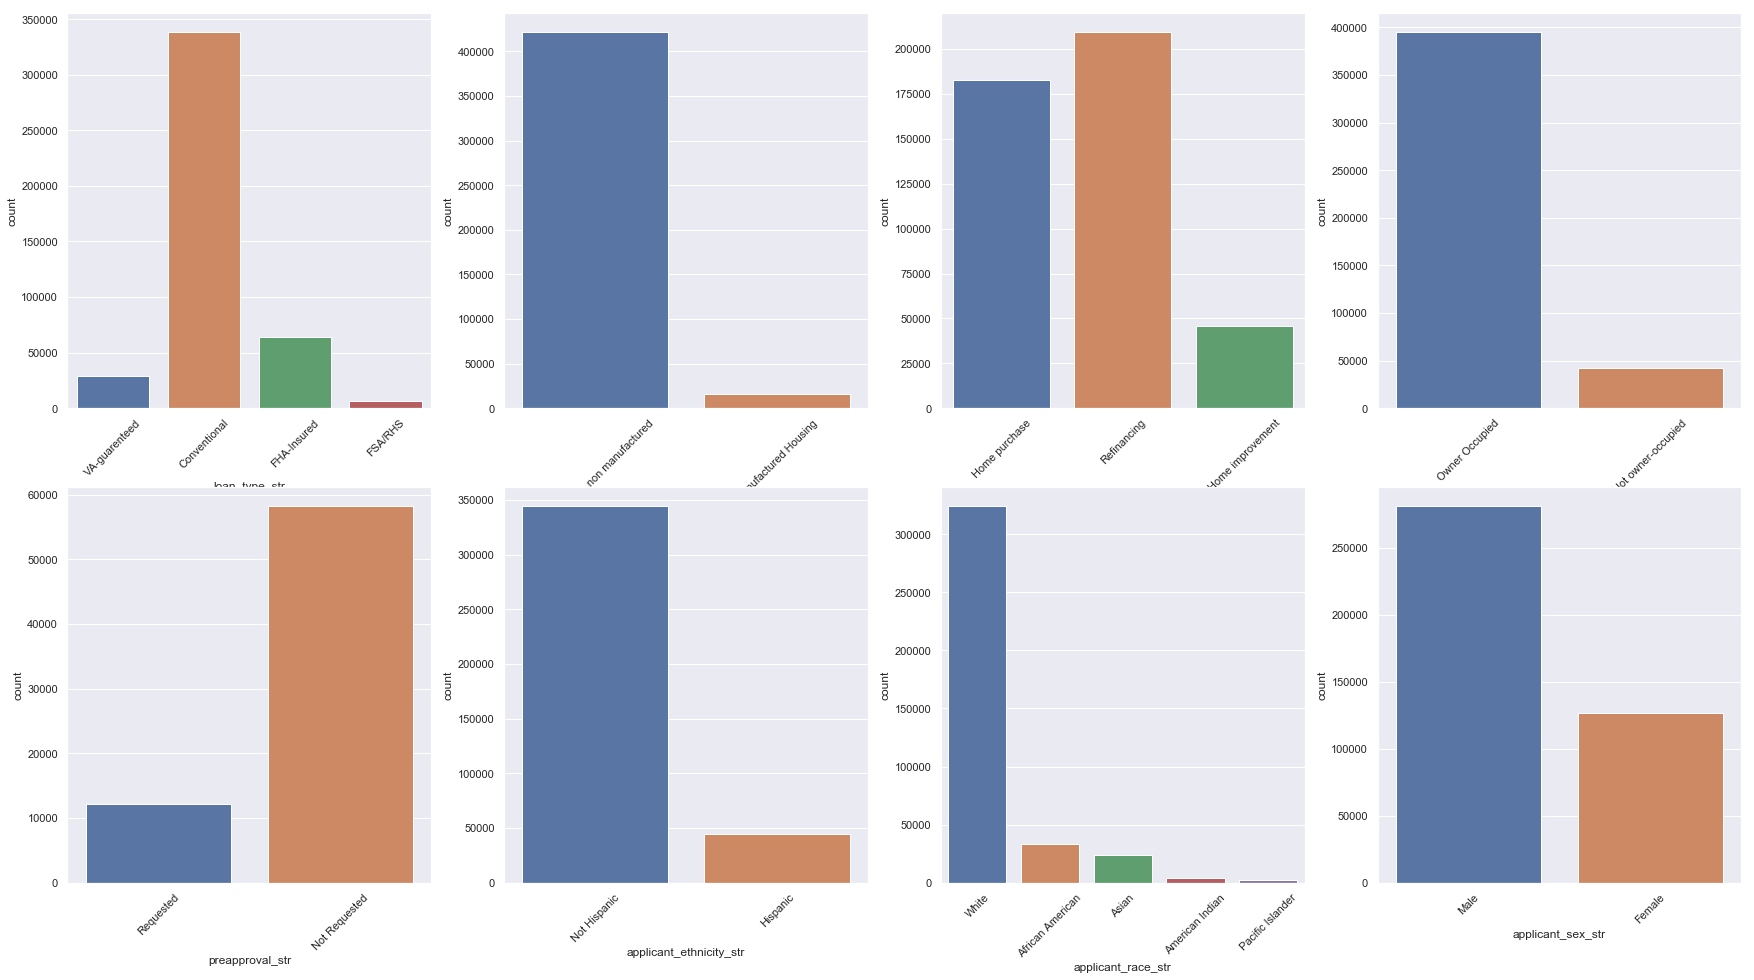

In [ ]:


# set default style
sns.set()

# plot distribution in grid
fig, ax = plt.subplots(2, 4, figsize=(30, 16))
for variable, subplot in zip(categorical_df, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

In [ ]:
# normalize! Columns to consider
numeric_cols =[ 'loan_amount', 'applicant_income', 'population', 'ffiecmedian_family_income',
               'number_of_owner-occupied_units', 'number_of_1_to_4_family_units']

for col in numeric_cols:
    utilities.mean_normalize_df_col(df, col)


numeric_df = df[numeric_cols]
numeric_df['label'] = pd.Series( df['accepted'] )
numeric_df.head(5)

C:\workspace\Mortgage-Classifier-Capstone\utilities.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[col_key] = (c - c.mean())/c.std()
C:\Users\BenMcC\Conda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,loan_amount,applicant_income,population,ffiecmedian_family_income,number_of_owner-occupied_units,number_of_1_to_4_family_units,label
0,-0.647616,-0.516071,0.289802,-0.583483,-0.971095,0.823355,1
1,-0.145684,-0.301738,0.132660,-0.972071,0.258117,0.239308,0
2,-0.215397,-0.236789,0.249876,-0.102988,-0.911398,-0.920035,1
3,-0.252577,0.010018,0.459766,0.619338,0.804886,0.448209,1
4,0.444551,-0.210809,0.483575,-0.415906,0.043751,-0.046152,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002794A8FDC18>,
      dtype=object)

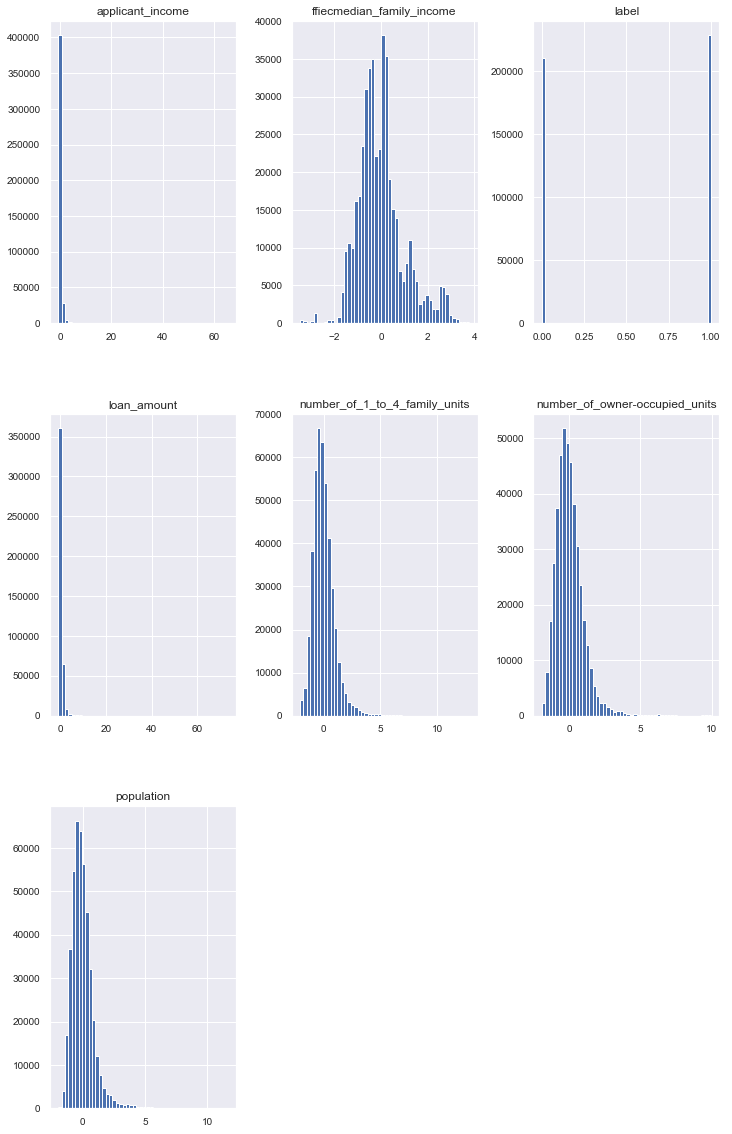

In [ ]:
# look at the distributions
num_bins = 50 #int(math.sqrt(len(df)))
numeric_df.hist(figsize=(12,20), bins=num_bins, xlabelsize=10, ylabelsize=10)

In [ ]:
# export post transform copy
df.to_csv('./data/post_transform.csv', index=False)

In [ ]:
# not as helpful visualizations with classification problem labels
# box plots
#fig, ax = plt.subplots(3, 3, figsize=(15, 10))
#for var, subplot in zip(categorical_df, ax.flatten()):
#    sns.boxplot(x=var, y='accepted', data=df, ax=subplot)

#cond_plot = sns.FacetGrid(data=df, col='loan_type_str', col_wrap=4)
#cond_plot.map(sns.scatterplot, 'population', 'accepted');

In [ ]:
# remove all excess columns

drop_cols = [ 'loan_type_str', 'property_type_str', 'loan_purpose_str', 'occupancy_str', 'preapproval_str', 'applicant_ethnicity_str',
                     'applicant_race_str', 'applicant_sex_str', 'msa_md_str', 'state_code_str', 'county_code_str','occupancy', 'applicant_sex']
drop_cols

In [ ]:

df_clean = df.drop(columns=drop_cols)
df_clean.to_csv('./data/clean.csv', index=False)